In [1]:
import pickle
from plotnine import * 
from pandas import * 
import seaborn as sns

In [2]:
data=pickle.load(open("/mnt/lab_data3/soumyak/adpd/deeplearning/predictions/regression/single_cell/pickles/microglia.new.preds.1",'rb'))

In [7]:
data=pickle.load(open("/mnt/lab_data3/soumyak/adpd/deeplearning/predictions/regression/bulk/pickles/PD_CTRL_SUNI.preds.7",'rb'))

In [8]:
preds=np.concatenate((data[0],data[1].values),axis=1)
preds_df=DataFrame(data=preds,
                  index=range(preds.shape[0]),
                  columns=["predicted","labels"])
display(preds_df.head())
display(preds_df.shape)

,predicted,labels
0,1.616019,0.0
1,2.190687,0.0
2,2.246070,0.0
3,2.093422,0.0
4,1.995299,0.0


(7408802, 2)

In [9]:
nonzero_preds_df=preds_df[preds_df['labels']>1]
display(nonzero_preds_df.head())
display(nonzero_preds_df.shape)

,predicted,labels
16,2.720086,2.355780
17,2.814638,2.544886
18,3.196863,2.649707
19,3.090313,2.683865
20,2.246567,2.638200


(116474, 2)

In [10]:
subsampled = preds_df.sample(frac=0.2)
display(subsampled.head())
display(subsampled.shape)

,predicted,labels
1756762,0.008148,0.00000
5825444,0.017508,0.00000
202938,0.974909,1.62563
3542508,0.024351,0.00000
5013436,0.211712,0.00000


(1481760, 2)

/users/soumyak/miniconda3/envs/dragonn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/users/soumyak/miniconda3/envs/dragonn/lib/python3.7/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 25337 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


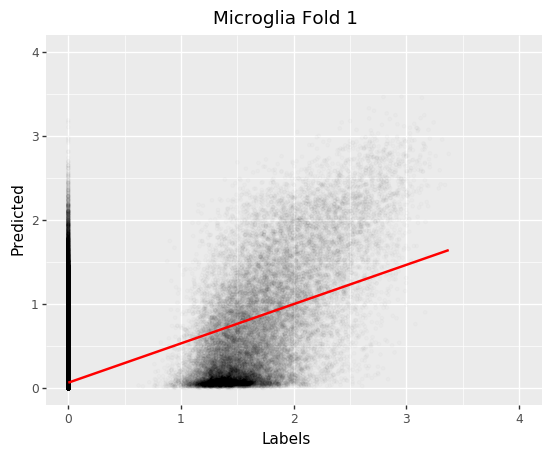

<ggplot: (-9223363275410979198)>

In [11]:
ggplot(subsampled,aes(x="labels",y="predicted"))+geom_point(size=1,alpha=0.01)+geom_smooth(method='lm',color='red')+xlab("Labels")+ylab("Predicted")+xlim(0,4)+ylim(0,4)+ggtitle("Microglia Fold 1")

In [ ]:
for fold in [1,7,3,0,9,6]:
    data=pickle.load(open("/mnt/lab_data3/soumyak/adpd/deeplearning/predictions/regression/single_cell/pickles/microglia.preds."+str(fold),'rb'))
    preds=np.concatenate((data[0],data[1].values),axis=1)
    preds_df=DataFrame(data=preds,
                  index=range(preds.shape[0]),
                  columns=["predicted","labels"])
    nonzero_preds_df=preds_df[preds_df['labels']>0]
    display(ggplot(nonzero_preds_df,aes(x="labels",y="predicted"))
            +geom_point(size=1,alpha=0.1)+xlab("Labels")
            +ylab("Predicted")+ggtitle("Microglia IDR Fold "+str(fold))
            +xlim(0,4)+ylim(0,4))

In [ ]:
for fold in [1,7,3,0,9,6]:
    data=pickle.load(open("/mnt/lab_data3/soumyak/adpd/deeplearning/predictions/regression/single_cell/pickles/microglia.overlap.preds."+str(fold),'rb'))
    preds=np.concatenate((data[0],data[1].values),axis=1)
    preds_df=DataFrame(data=preds,
                  index=range(preds.shape[0]),
                  columns=["predicted","labels"])
    nonzero_preds_df=preds_df[preds_df['labels']>0]
    display(ggplot(nonzero_preds_df,aes(x="labels",y="predicted"))
            +geom_point(size=1,alpha=0.1)+xlab("Labels")
            +ylab("Predicted")+ggtitle("Microglia Overlap Fold "+str(fold))
            +xlim(0,4)+ylim(0,4))